In [1]:
%%capture
%run shared.ipynb

# Datavisualisering for skeive identiteter

<font color=Gray>(For English, visit this link instead: )</font>

Dette er en interaktiv [Voilà](https://github.com/voila-dashboards/voila/blob/master/README.md) dashboard visning av en [Jupyter Notebook](https://jupyter.org), med data fra den landsdekkende undersøkelsen "Er bibliotek for alle? LHBTIQ+ personers holdninger til og erfaringer med folkebibliotek i Norge".
Du har mest sannsynlig funnet veien hit via <a href="http://BibliotekForAlle.carrd.co" target="_blank">BibliotekForAlle.carrd.co</a>, men hvis ikke kan du gå dit for supplerende materiale. 

### Total antall respondenter vs. antall responser

Når jeg skulle gruppere undersøkelsens respondenter etter orientering, hadde jeg et valg mellom å lage gjensidig-utelukkende grupper som inkluderte under halvparten av respondentene (ca 40% valgte kun én merkelapp), eller å lage overlappende grupper som inkluderte ca dobbelt så mange datapunkter enn det var respondenter.

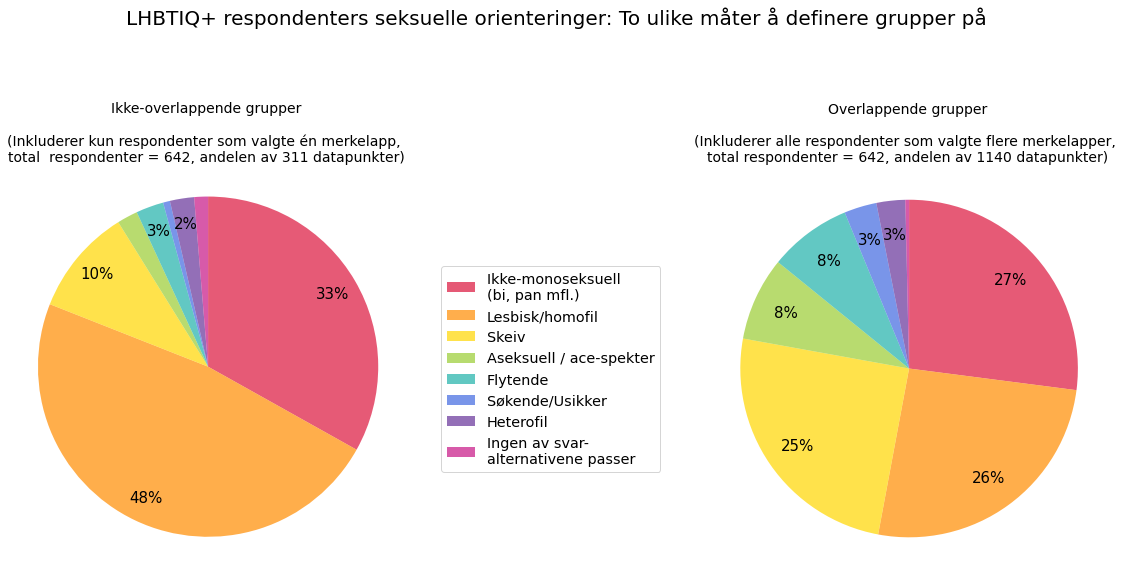

In [41]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def my_autopct(pct):
    if pct >= 2:
        return f'{pct:.0f}%'
    else:
        return None


labels = 'Ikke-monoseksuell \n(bi, pan mfl.)', 'Lesbisk/homofil', 'Skeiv', 'Aseksuell / ace-spekter', 'Flytende', 'Søkende/Usikker', 'Heterofil', 'Ingen av svar-\nalternativene passer'
sizes1 = [len(bi_only), len(LG_only), len(q_only), len(ace_only), len(fluid_only), len(questioning_only), len(het_only), len(none_only)]
sizes2 = [len(bi_plus), len(LG_plus), len(q_plus), len(ace_plus), len(fluid_plus), len(questioning_plus), len(het_plus), len(none_only)]
colors = ['crimson', 'darkorange', 'gold', 'yellowgreen', 'lightseagreen', 'royalblue', 'rebeccapurple', "MediumVioletRed"]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice

fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].pie(sizes1, explode=None, labels=labels, counterclock=False, colors = colors, wedgeprops={'alpha':0.7}, textprops={'fontsize': '15'}, labeldistance=None, pctdistance=.85, autopct=my_autopct,
        shadow=False, startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].pie(sizes2, explode=None, labels=labels, counterclock=False, colors = colors, wedgeprops={'alpha':0.7}, textprops={'fontsize': '15'}, labeldistance=None, pctdistance=.8, 
        autopct=my_autopct,
        shadow=False, startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Ikke-overlappende grupper\n\n(Inkluderer kun respondenter som valgte én merkelapp, \ntotal  respondenter = 642, andelen av 311 datapunkter)', fontsize=14)
axs[1].set_title('Overlappende grupper\n\n(Inkluderer alle respondenter som valgte flere merkelapper, \ntotal respondenter = 642, andelen av 1140 datapunkter)', fontsize=14)
axs[1].title.set_position([.5, 0])
plt.legend(fontsize="x-large", loc="center left", bbox_to_anchor=(-.75, 0, 0, 1))
plt.suptitle("LHBTIQ+ respondenters seksuelle orienteringer: To ulike måter å definere grupper på", fontsize=20)
plt.subplots_adjust(left=0, bottom=0, right=1, top=.7, wspace=.85, hspace=0)
plt.show()

De fleste skeive respondenter (ca 57%) valgte mer enn én merkelapp for å beskreve orienteringen sin. Dette gjør at statiske figurer som sirkeldiagrammene vist over gir et falskt bilde som ikke gjenspeiler dataenes kompleksitet. 

## Interaktiv:

Nedenfor kan du velge to eller tre orienteringer fra rullegardinmenyene for å se eksempler på hvor mye overlapp det er mellom ulike orienteringer. (Overlapp er ikke skalert)


In [49]:
reversed_orientations={}
reversed_orientations["Velg en orientering"]=""
for k,v in orientation_names.items():
    reversed_orientations[v]=k

dropdown1=widgets.Dropdown(options=reversed_orientations, value='')
dropdown2=widgets.Dropdown(options=reversed_orientations, value='')
dropdown3=widgets.Dropdown(options=reversed_orientations, value='')
gui_in_visual_basic=widgets.HBox([dropdown1, dropdown2, dropdown3])

def interactive_venn(O1, O2, O3):
    if not O1:
        O1 = O2
        O2 = None
    if not O2:
        O2 = O3
        O3 = None
    if not O1 or not O2:
        print("Velg minst to for å tegne Venndiagram")
        return
    orientation_venn(O1, O2, O3)

out = widgets.interactive_output(interactive_venn, {"O1":dropdown1, "O2":dropdown2, "O3":dropdown3})
out.layout.height = '650px'
display(gui_in_visual_basic, out)


Output(layout=Layout(height='650px'))

### Total antall og andel respondenter i hver orienteringskategori som valgte kun den orienteringen:

In [54]:
orientation_keys = {
    "LG" : (LG_plus, LG_only, "Homofil eller lesbisk"),
    "Bi" : (bi_plus, bi_only, "Ikke-monoseksuell"),
    "Het" : (het_plus, het_only, "Heterofil"),
    "None" : (none_plus, none_only, "Ingen av svaralternativene passer"),
    "Q" : (q_plus, q_only, "Skeiv"),
    "Fluid" : (fluid_plus, fluid_only, "Flytende"),
    "Ace" : (ace_plus, ace_only, "Aseksuell / ace-spekter"),
    "Questioning" : (questioning_plus, questioning_only, "Søkende/usikker"),
}


def print_group_info(key):
    x_plus, x_only, x_label = orientation_keys[key]
    
    x_only_count = len(x_only)
    x_plus_count = len(x_plus)
        
    x_only_frac = x_only_count/x_plus_count
    print(x_label, "respondenter (overlappende):", len(x_plus))
    print(x_label, "respondenter (ikke-overlappende):", len(x_only))
    print (f"{x_only_frac:.1%} av de som valgte", x_label, "valgte KUN denne merkelappen")
    

for key in orientation_keys.keys():
    print_group_info(key)
    print()

Homofil eller lesbisk respondenter (overlappende): 291
Homofil eller lesbisk respondenter (ikke-overlappende): 146
50.2% av de som valgte Homofil eller lesbisk valgte KUN denne merkelappen

Ikke-monoseksuell respondenter (overlappende): 304
Ikke-monoseksuell respondenter (ikke-overlappende): 101
33.2% av de som valgte Ikke-monoseksuell valgte KUN denne merkelappen

Heterofil respondenter (overlappende): 31
Heterofil respondenter (ikke-overlappende): 7
22.6% av de som valgte Heterofil valgte KUN denne merkelappen

Ingen av svaralternativene passer respondenter (overlappende): 20
Ingen av svaralternativene passer respondenter (ikke-overlappende): 4
20.0% av de som valgte Ingen av svaralternativene passer valgte KUN denne merkelappen

Skeiv respondenter (overlappende): 280
Skeiv respondenter (ikke-overlappende): 31
11.1% av de som valgte Skeiv valgte KUN denne merkelappen

Flytende respondenter (overlappende): 89
Flytende respondenter (ikke-overlappende): 8
9.0% av de som valgte Flytende 